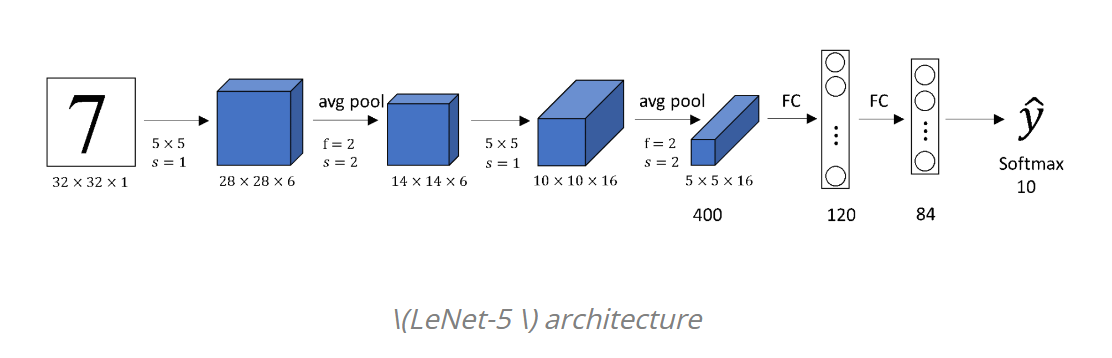

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization
x_train /=255
x_test /=255


In [7]:
# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [8]:
import numpy as np
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
model  = Sequential()

# Conv Layer 1
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28,28,1)))
# Avg pooling - replace with max pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Conv Layer 2
model.add(Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
# Avg pooling - replace with max pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten : 2D to 1D
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(120, activation='relu'))
# Fully Connected Layer 2
model.add(Dense(84, activation='relu'))
# Output Layer
model.add(Dense(10, activation='softmax'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [11]:
model.compile(optimizer='Adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 17s 5ms/step - loss: 0.2477 - accuracy: 0.9259 - val_loss: 0.0876 - val_accuracy: 0.9738
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0718 - accuracy: 0.9771 - val_loss: 0.0540 - val_accuracy: 0.9827
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0408 - val_accuracy: 0.9868
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0451 - val_accuracy: 0.9852
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0363 - val_accuracy: 0.9884


In [ ]:
# CIFAR-10 Dataset

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [25]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [26]:
x_train, x_test = x_train/255.0, x_test/255.0

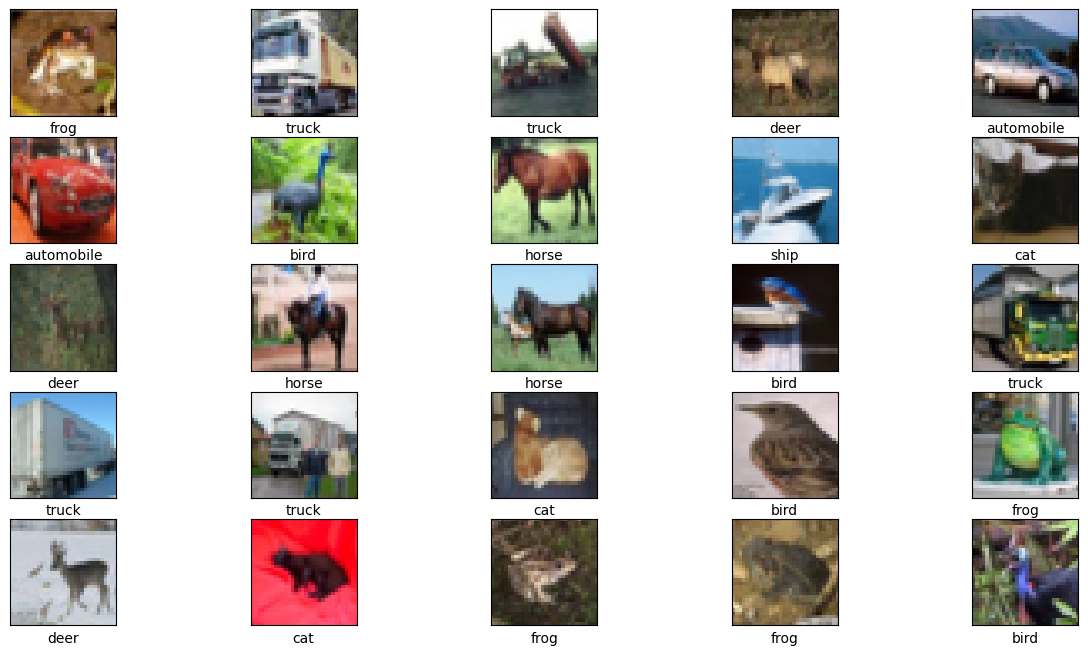

In [27]:
"""
Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
"""
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[y_train[i][0]])
plt.show()

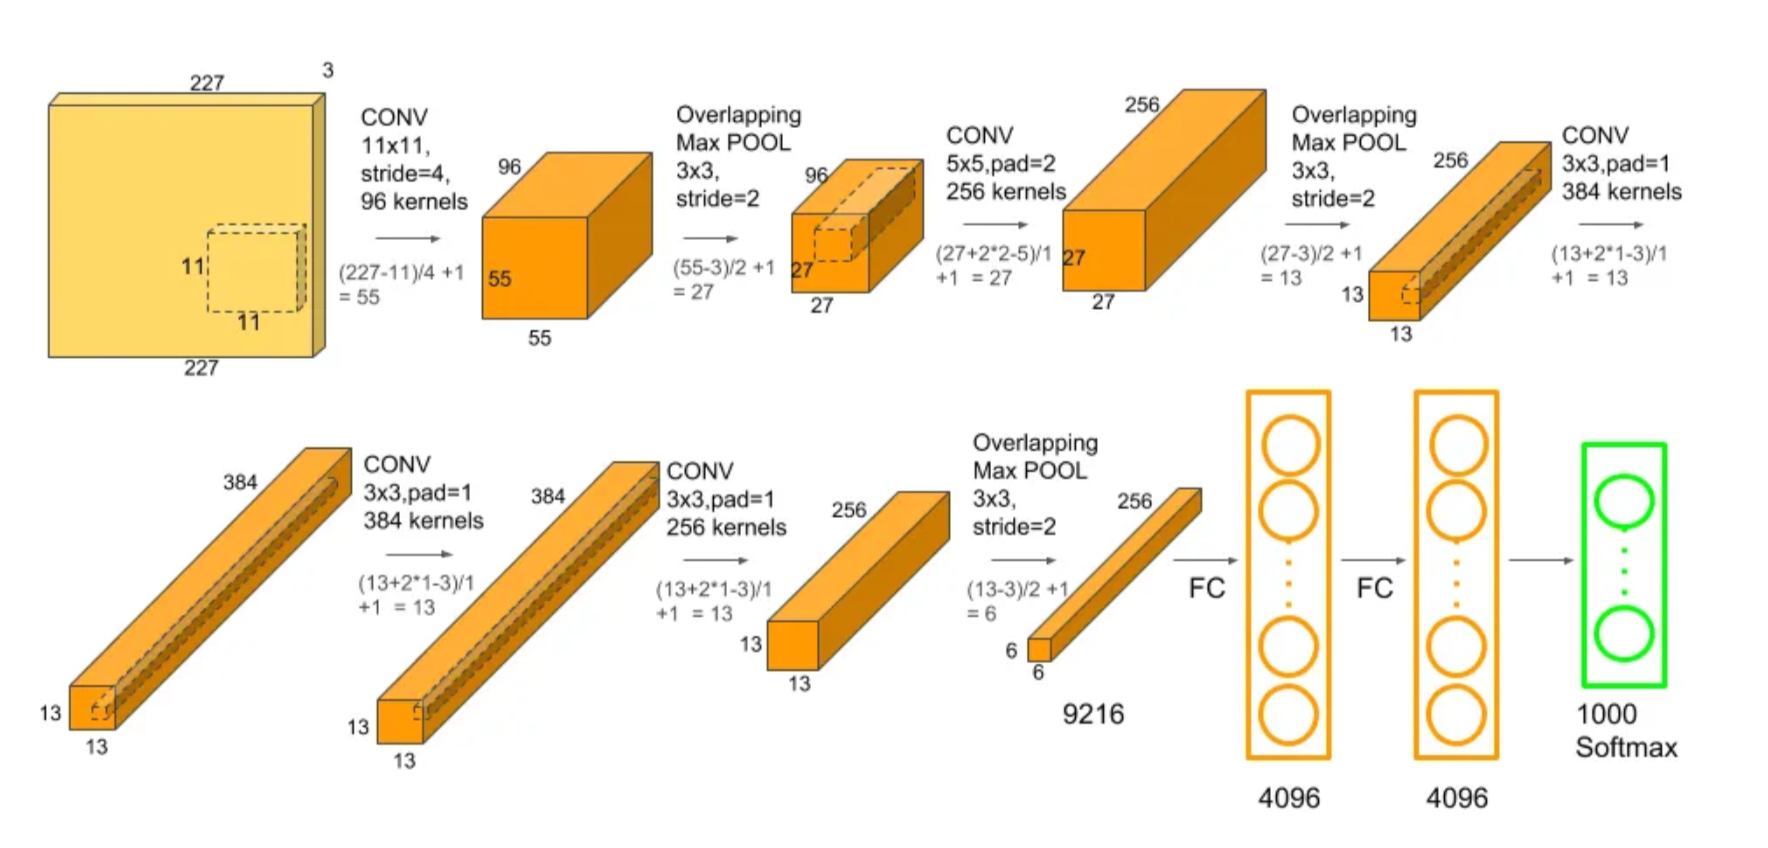

In [37]:
model = Sequential()

# Conv1
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(32,32,3)))
# Maxplooling
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
# Conv2
model.add(Conv2D(64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
# Maxplooling

# Flatten
model.add(Flatten())

# FCL 1 - 6
model.add(Dense(64, activation='relu'))

# output - 8
model.add(Dense(10, activation='softmax'))

# summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 14400)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                921664    
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                      

In [38]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 6s 6ms/step - loss: 1.5624 - accuracy: 0.4357 - val_loss: 1.2479 - val_accuracy: 0.5502
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 1.1585 - accuracy: 0.5869 - val_loss: 1.0895 - val_accuracy: 0.6153
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 1.0009 - accuracy: 0.6469 - val_loss: 1.0009 - val_accuracy: 0.6508
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.8957 - accuracy: 0.6853 - val_loss: 0.9552 - val_accuracy: 0.6666
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.8158 - accuracy: 0.7142 - val_loss: 0.9664 - val_accuracy: 0.6603


# Data Augmentation

In [40]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator # Data Augmentation package
from keras.utils import img_to_array, array_to_img, load_img

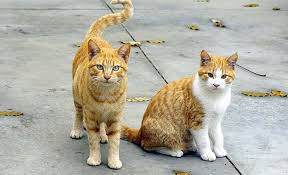

In [42]:
# Load the image
image_file = '/content/cat_image.jpeg'
cat_image = keras.preprocessing.image.load_img(image_file)
cat_image

In [43]:
cat_image_array = keras.preprocessing.image.img_to_array(cat_image)
cat_image_array

array([[[191., 196., 192.],
        [191., 196., 192.],
        [191., 196., 192.],
        ...,
        [175., 177., 174.],
        [174., 176., 173.],
        [174., 176., 173.]],

       [[189., 194., 190.],
        [189., 194., 190.],
        [189., 194., 190.],
        ...,
        [174., 176., 173.],
        [173., 175., 172.],
        [173., 175., 172.]],

       [[185., 190., 186.],
        [185., 190., 186.],
        [185., 190., 186.],
        ...,
        [172., 174., 173.],
        [171., 173., 172.],
        [171., 173., 172.]],

       ...,

       [[192., 194., 191.],
        [194., 196., 193.],
        [193., 195., 192.],
        ...,
        [215., 218., 223.],
        [202., 205., 210.],
        [216., 219., 224.]],

       [[183., 185., 182.],
        [188., 190., 187.],
        [189., 191., 188.],
        ...,
        [231., 234., 239.],
        [223., 226., 231.],
        [233., 236., 241.]],

       [[178., 180., 177.],
        [187., 189., 186.],
        [189., 1

In [45]:
# Using Data Augmentation method

def plot_image(original_image, updated_image):
  plt.figure(figsize=(14,8))
  # original_image
  plt.subplot(1,2,1)
  plt.title("original image")
  plt.imshow(original_image)

  # updated image
  plt.subplot(1,2,2)
  plt.title('Updated image')
  plt.imshow(updated_image)

  plt.show()

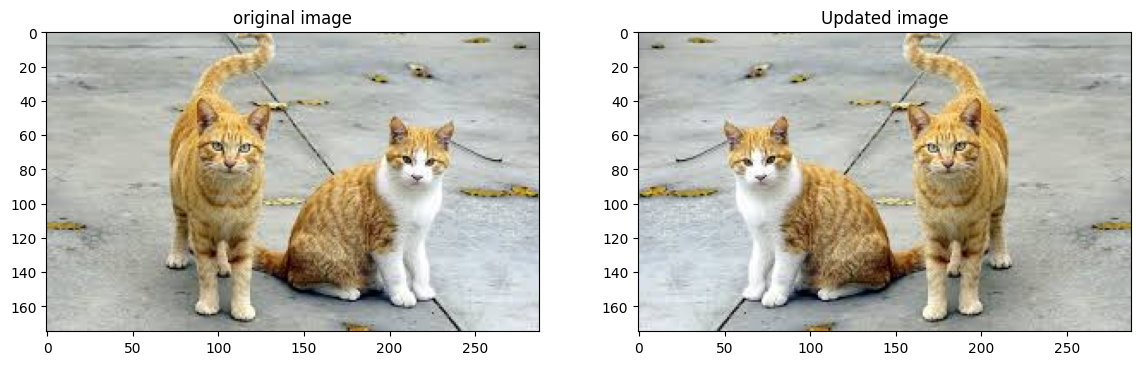

In [46]:
# horizontal_flip
updated_data = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
updated_array = updated_data.random_transform(cat_image_array)
updated_image = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)
plt.show()

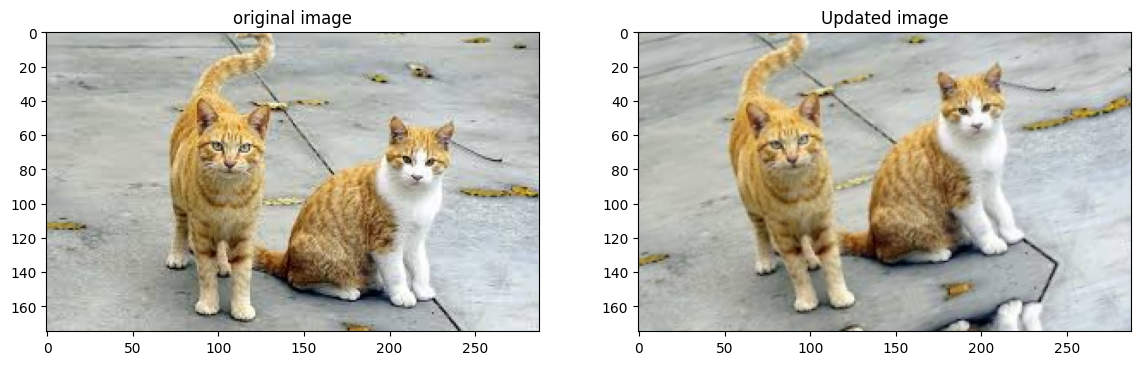

In [62]:
# rotation_range=0
updated_data = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, fill_mode='reflect')
updated_array = updated_data.random_transform(cat_image_array)
updated_image = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)
plt.show()

In [50]:
print(cat_image_array)
print("*************"*10)
print(updated_array)

[[[191. 196. 192.]
  [191. 196. 192.]
  [191. 196. 192.]
  ...
  [175. 177. 174.]
  [174. 176. 173.]
  [174. 176. 173.]]

 [[189. 194. 190.]
  [189. 194. 190.]
  [189. 194. 190.]
  ...
  [174. 176. 173.]
  [173. 175. 172.]
  [173. 175. 172.]]

 [[185. 190. 186.]
  [185. 190. 186.]
  [185. 190. 186.]
  ...
  [172. 174. 173.]
  [171. 173. 172.]
  [171. 173. 172.]]

 ...

 [[192. 194. 191.]
  [194. 196. 193.]
  [193. 195. 192.]
  ...
  [215. 218. 223.]
  [202. 205. 210.]
  [216. 219. 224.]]

 [[183. 185. 182.]
  [188. 190. 187.]
  [189. 191. 188.]
  ...
  [231. 234. 239.]
  [223. 226. 231.]
  [233. 236. 241.]]

 [[178. 180. 177.]
  [187. 189. 186.]
  [189. 191. 188.]
  ...
  [227. 230. 235.]
  [225. 228. 233.]
  [227. 230. 235.]]]
**********************************************************************************************************************************
[[[174. 176. 173.]
  [174. 176. 173.]
  [175. 177. 174.]
  ...
  [191. 196. 192.]
  [191. 196. 192.]
  [191. 196. 192.]]

 [[173. 1

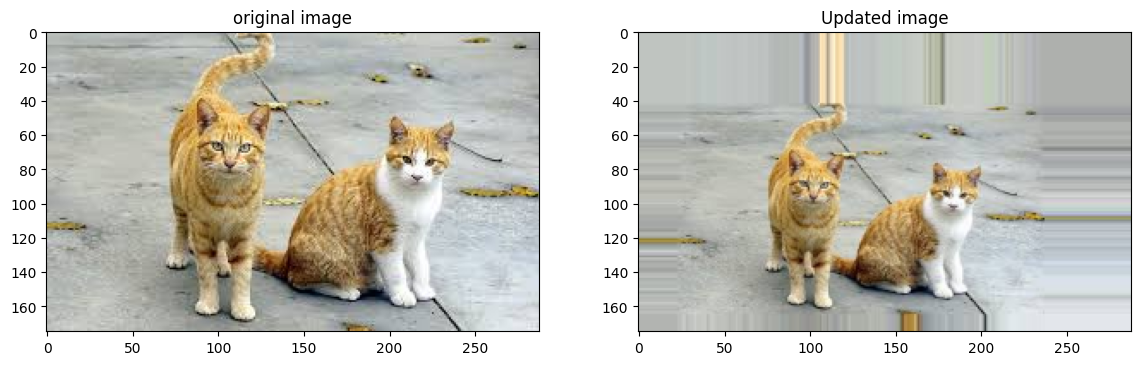

In [57]:
# zoom_range=0.0
updated_data = keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5,1.5])
updated_array = updated_data.random_transform(cat_image_array)
updated_image = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)
plt.show()

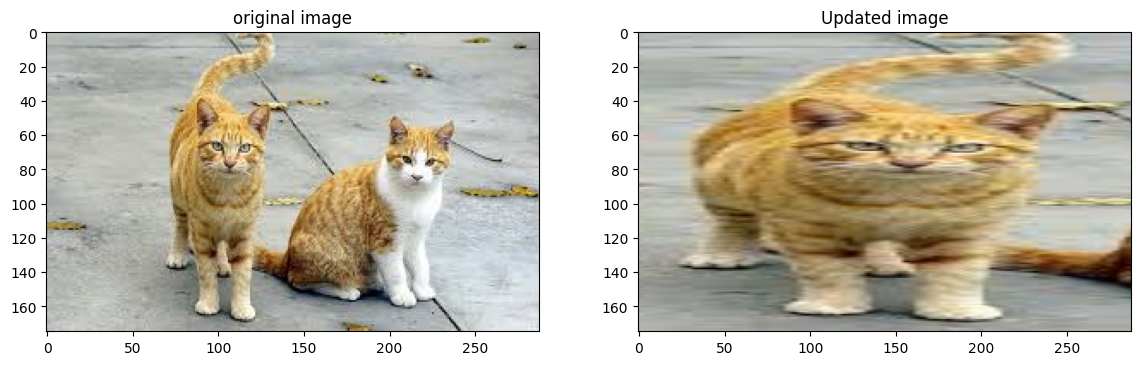

In [59]:
updated_data = keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.1,1.3])
updated_array = updated_data.random_transform(cat_image_array)
updated_image = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)
plt.show()

In [ ]:
updated_data = keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.1,1.3])
updated_array = updated_data.random_transform(cat_image_array)
updated_image = keras.preprocessing.image.array_to_img(updated_array)
plot_image(cat_image, updated_image)
plt.show()

In [63]:
dataset = keras.preprocessing.image.ImageDataGenerator(
        rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.3,
        shear_range=0.5,
    zoom_range=0.2,
    fill_mode='reflect',
      horizontal_flip=True,
    rescale=1./255,
    )

In [64]:
cat_image_array_reshape = cat_image_array.reshape((1,) + cat_image_array.shape)

print(cat_image_array.shape)
print(cat_image_array_reshape.shape)


(175, 288, 3)
(1, 175, 288, 3)


In [67]:
directory = '/content/sample_data'
i = 0

for j in dataset.flow(cat_image_array_reshape, save_to_dir=directory, save_prefix='cat_image', save_format='jpg'):
  i +=1
  if i >25:
    break